<h2> Simulating a Random Walk and Checking if Sample Paths are Bounded </h2>

We'll now simulate a random walk by drawing numbers from a Bernoulli distribution.  This distribution has a single parameter $p$.  It's density function is given by
$$
f(x) = \begin{cases}
p & \text{if } x=1\\
1-p & \text{if } x=0\\
0 & \text{else}
\end{cases}
$$
In other words, a Bernoulli($p$)-distributed random variable takes the value 1 with probability $p$ and the value 0 with probability $1-p$.  With $p=1/2$, this is a natural representation of a single coin flip in the sequence which gives us our random walk, however we'll need to correct for the fact that the running tally decreases by 1 half the time, rather than standing still.

In [49]:
using Distributions
using PyPlot

p = 0.5;
d = Bernoulli(p);
T = 1000;

Here I've specified the horizon for the simulation to be $T=10,000$ periods.  We'll now produce 10,000 Bernoulli draws, and set up the variable $s_t$ which will store the tally.

In [50]:
BernDraws = rand(d,10000);

To convert the draws to steps in the random walk, we simply need to replace every zero draw with -1.  Recall that . tells Julia to apply a function or operator component-wise.  In the following line, this means that the first term on the right hand side will return a vector in which the Boolean criterion of being at least 1 is checked against each component of BernDraws.  If the criterion is satisfied, the returned vector will contain a 1, if not, it will contain a zero.

The second term works similarly, so the entire expression just replaces zeros in BernDraws with -1.

In [51]:
WalkSteps = (BernDraws.>=1) + -1*(BernDraws.<=0);

Now we just need to fill $s_t$ with the cummulative sum of steps.  A classical way of doing this would be do write a loop over each entry in WalkSteps, adding it to a pre-allocated array (say st).  However, we can also do this in a couple of lines by initializing the first component of WalkSteps to be zero and applying the cummulative sum function cumsum().

In [52]:
WalkSteps[1] = 0;
st = cumsum(WalkSteps)

10000-element Array{Int64,1}:
    0
   -1
    0
    1
    0
   -1
   -2
   -1
   -2
   -3
   -4
   -5
   -6
    ⋮
 -160
 -159
 -160
 -161
 -162
 -163
 -162
 -163
 -162
 -161
 -162
 -161

Plotting the sample path shows the typical noisy, wandering path typical of nonstationary economic or financial time series.

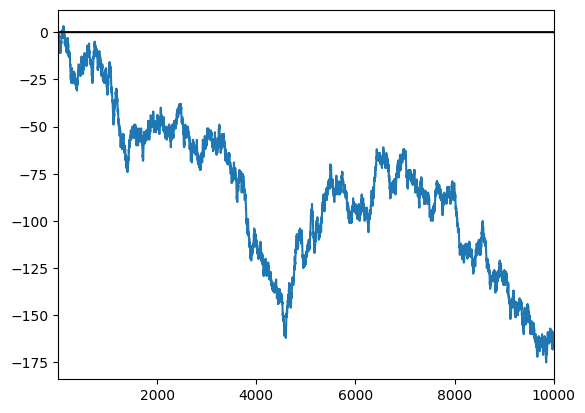

In [53]:
plot(st);
plot(1:1:10000,zeros(length(1:1:10000)),color="k")
xlim([1,10000]);

Next, we'll investigate whether sample paths of random walks stay bounded.  Specifically, we'll simulate the random walk several times and count how many of the simulations satisfy
$$
|s_t| \leq \sqrt{T} \text{ for every } t,\ 1\leq t\leq T
$$
Note that the theoretical random walk continues indefinitely, $T\to\infty$.  If we were to increases the length of the simulation, we would simultaneously strengthen the unboundedness criterion.

The first thing we need to do is produce a $T\times N$ matrix of Bernoulli draws (coin flips), where $N$ is the number of simulations.

In [54]:
bound = T^(1.0/2.0);
N = 1000;
BernDrawsBound = rand(d,T,N)

1000×1000 Array{Bool,2}:
 0  0  0  0  0  0  0  1  1  0  1  1  0  …  0  0  1  1  0  1  1  1  1  1  0  1
 1  0  1  1  1  1  1  0  1  1  0  0  0     1  1  0  1  1  0  0  0  1  0  1  0
 0  1  0  1  0  1  0  1  1  0  1  1  1     1  0  0  0  1  0  1  1  1  0  0  1
 1  1  0  1  1  1  1  1  1  1  1  1  1     0  0  1  0  1  0  0  0  1  0  0  1
 1  0  0  1  1  1  0  0  1  1  0  0  0     1  1  0  0  1  0  0  0  1  1  1  1
 0  0  1  1  0  1  0  1  0  1  0  1  0  …  0  0  0  1  0  0  0  1  0  0  0  1
 0  0  1  0  1  0  0  1  1  0  0  0  1     0  0  0  1  0  0  1  0  0  1  1  1
 0  0  0  1  0  0  0  0  1  0  0  0  0     0  0  1  1  1  1  1  1  0  1  1  1
 0  1  1  1  1  0  0  1  1  0  1  0  1     1  1  1  1  0  0  1  1  0  0  1  0
 1  0  0  0  1  1  1  0  0  0  1  0  1     0  0  0  0  0  1  1  1  1  0  1  0
 1  1  0  0  0  1  1  1  1  0  1  1  0  …  1  0  1  0  1  1  1  1  0  1  0  1
 0  0  1  0  0  1  1  0  0  1  0  1  0     1  0  0  1  0  0  0  0  1  0  0  1
 1  0  1  0  1  1  1  1  1  0  0  0  1 

We convert these to steps exactly as before, and initialize each simulation to zero.

In [55]:
WalkStepsBound = (BernDrawsBound.>=1) + -1*(BernDrawsBound.<=0);
WalkStepsBound[1,:] = zeros(N);

To complete the simulations, we need to compute the column-wise cummulative sum of WalkStepsBound.  To do this, we can hand the optional argument dims to cumsum, to specify the sum should be done over the first (column) dimension.

In [56]:
stBound = cumsum(WalkStepsBound,dims=1)

1000×1000 Array{Int64,2}:
   0   0   0    0   0  0    0    0   0  …    0    0   0   0   0   0   0   0
   1  -1   1    1   1  1    1   -1   1       1   -1  -1  -1   1  -1   1  -1
   0   0   0    2   0  2    0    0   2       2   -2   0   0   2  -2   0   0
   1   1  -1    3   1  3    1    1   3       3   -3  -1  -1   3  -3  -1   1
   2   0  -2    4   2  4    0    0   4       4   -4  -2  -2   4  -2   0   2
   1  -1  -1    5   1  5   -1    1   3  …    3   -5  -3  -1   3  -3  -1   3
   0  -2   0    4   2  4   -2    2   4       2   -6  -2  -2   2  -2   0   4
  -1  -3  -1    5   1  3   -3    1   5       3   -5  -1  -1   1  -1   1   5
  -2  -2   0    6   2  2   -4    2   6       2   -6   0   0   0  -2   2   4
  -1  -3  -1    5   3  3   -3    1   5       1   -5   1   1   1  -3   3   3
   0  -2  -2    4   2  4   -2    2   6  …    2   -4   2   2   0  -2   2   4
  -1  -3  -1    3   1  5   -1    1   5       1   -5   1   1   1  -3   1   5
   0  -4   0    2   2  6    0    2   6       2   -6   2   0   

We can now check for periods where each simulation excess our bound of $\sqrt{T}$ by once again using componentwise Boolean conditions.  Here abs() is just the absolute value function.

In [57]:
Unbounded = abs.(stBound).>=bound;

By summing down each column of the matrix Unbounded, we will get a positive integer indicating how many times each simulation exceeded the bound.

In [58]:
TimesBoundHit = sum(Unbounded,dims=1)

1×1000 Array{Int64,2}:
 0  0  0  48  75  0  0  271  170  25  …  279  0  0  0  0  0  228  1  0  415

To find the number of simulations where this ever happened, we can once again use a Boolean condition that the number of times the bound was exceeded was at least 1, and sum up the results.

In [59]:
sum(TimesBoundHit.>=1)

610

Around 60 percent of the sample paths exceed the square root bound, which isn't particularly strong evidence of the paths eventually becoming unbounded.  On the other hand, repeating the exercise with a bound of $T^{1/3}$ results in every sample path exceeding the bound.